In [1]:
# My code
import fast_gillespie as fg
import fast_gillespie_viz as fgv

In [2]:
# Define linear homodimer

# Rates in terms of interpretable quantities
mean_num_monomers = 200.0
rate1 = mean_num_monomers
rate2 = 1.0

# Print out rate-determining quantities
print('mean_num_monomers = ', mean_num_monomers)

# Create fields
A = fg.Field(name='A', index_dim=1)

# Create rules
R_1 = fg.MonomerCreationRule(name='R_1', rate=rate1, particle=A)
R_2 = fg.MonomerAnnihilationRule(name='R_2', rate=rate2, particle=A)     

# Define fock space and rules
space = fg.FockSpace(fields=[A])
rules = fg.RuleSet(rules=[R_1, R_2])

def summary_stats_func():
    stats_dict = dict(
        num_A=len(A.indices),
    )
    return stats_dict

mean_num_monomers =  200.0


Progress:   0%|          | 0/30000 [00:00<?, ?it/s]

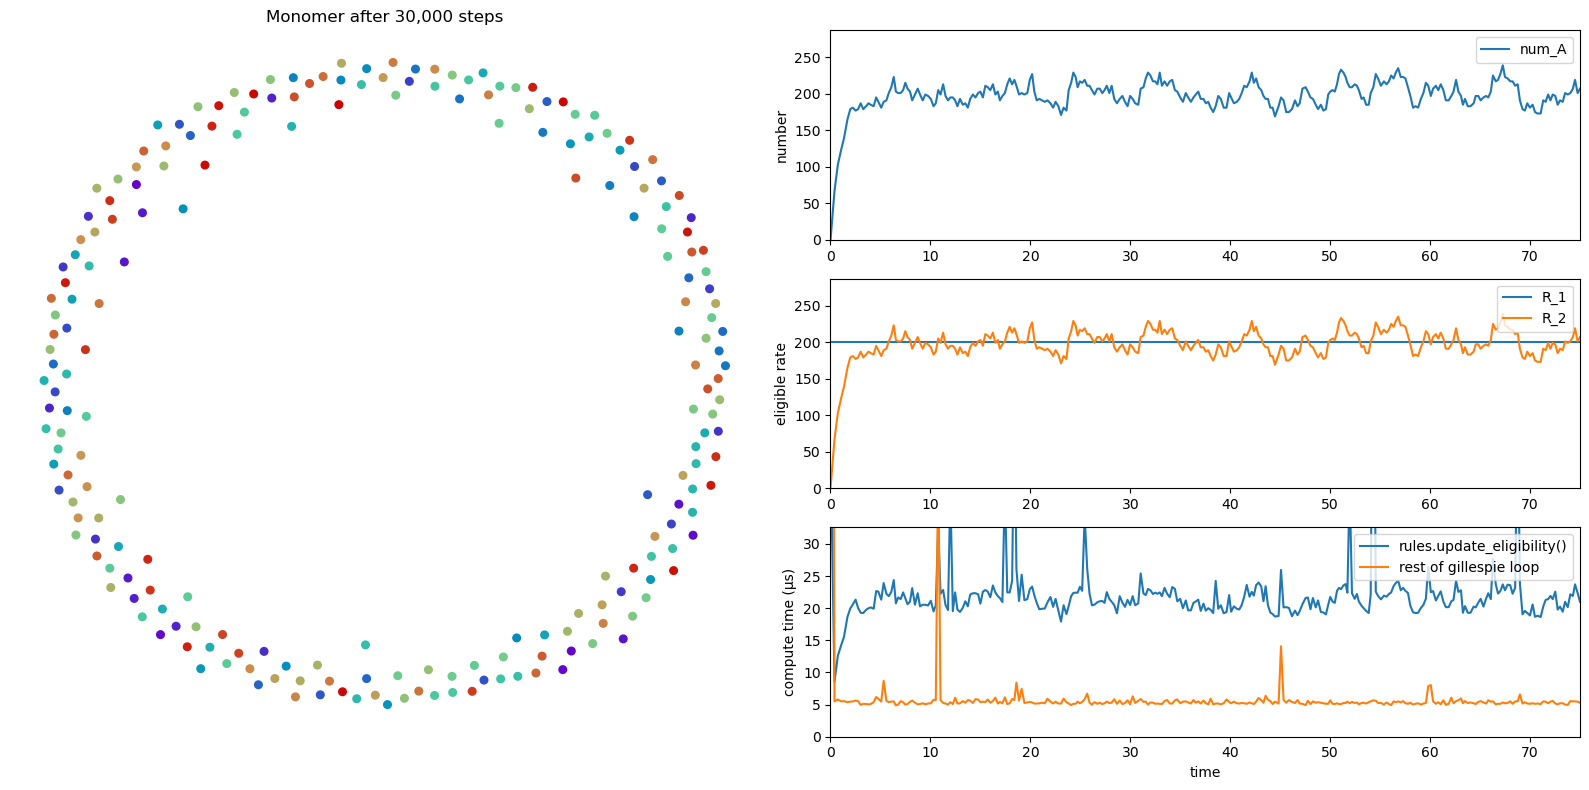

In [3]:
# Define, initialize, and run simulation
sim = fg.Simulation(space=space, rules=rules, custom_stats_func=summary_stats_func)
sim.initialize_state()
sim.run(num_steps=30_000, record_every=100)

fgv.show_sim_stats(sim, particle=A, interaction=None, directed=False, x_is_time=True, system_name='Monomer')